Simple model to classify the images across 10 different classes that are avilable in the MNIST Fashion dataset 
MNIST contains 70K images of different fashion items
images are 28x28 grey scale
![alt text](https://miro.medium.com/max/800/1*RNBs0OsymwAzDyYMk3_0Aw.jpeg)

In [0]:
import tensorflow as tf

Download the data from tf.keras API 

In [0]:
mnist = tf.keras.datasets.fashion_mnist

Load the data to (training_images, training_label) and (test_images, test_label) 

In [3]:
(training_images, training_labels), (test_images, test_labels) = mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


this is how the data is represented in different formats

[[  0   0   0   0   0   0   0   0  33  96 175 156  64  14  54 137 204 194 102   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0  73 186 177 183 175 188 232 255 223 219 194 179 186 213 146   0   0   0   0   0   0   0]
 [  0   0   0   0   0  35 163 140 150 152 150 146 175 175 173 171 156 152 148 129 156 140   0   0   0   0   0   0]
 [  0   0   0   0   0 150 142 140 152 160 156 146 142 127 135 133 140 140 137 133 125 169  75   0   0   0   0   0]
 [  0   0   0   0   0  54 167 146 129 142 137 137 131 148 148 133 131 131 131 125 140 140   0   0   0   0   0   0]
 [  0   0   0   0   0   0 110 188 133 146 152 133 125 127 119 129 133 119 140 131 150  14   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0 221 158 137 135 123 110 110 114 108 112 117 127 142  77   0   0   0   0   0   0   0]
 [  0   0   0   0   0   4   0  25 158 137 125 119 119 110 117 117 110 119 127 144   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0 123 156 129 112 110 102 112 100 121 117 129 11

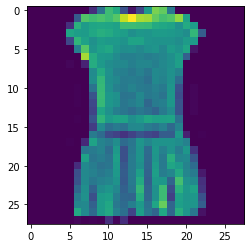

In [6]:
import numpy as np
np.set_printoptions(linewidth=200)
import matplotlib.pyplot as plt
#showing the image of the class
plt.imshow(training_images[3])
#showing how the data is saved in terms of 2D array
print(training_images[3])
#printing the image label which is represented in numbers to make it easy to be displayed in different languages
print(training_labels[3])

You'll notice that all of the values in the number are between 0 and 255. If we are training a neural network, for various reasons it's easier if we treat all values as between 0 and 1, a process called '**normalizing**'...and fortunately in Python it's easy to normalize a list like this without looping. You do it like this:

In [0]:
training_images = training_images/255.0
test_images = test_images/255.0

Let's now design the model 


In [0]:
model = tf.keras.models.Sequential([tf.keras.layers.Flatten(),
                                   tf.keras.layers.Dense(1024, activation=tf.nn.relu),
                                   tf.keras.layers.Dense(10, activation=tf.nn.softmax)])

**Sequential**: That defines a SEQUENCE of layers in the neural network

**Flatten**: Remember earlier where our images were a square, when you printed them out? Flatten just takes that square and turns it into a 1 dimensional set.

**Dense**: Adds a layer of neurons

Each layer of neurons need an activation function to tell them what to do. There's lots of options, but just use these for now.

**Relu** effectively means "If X>0 return X, else return 0" -- so what it does it it only passes values 0 or greater to the next layer in the network.

Softmax takes a set of values, and effectively picks the biggest one, so, for example, if the output of the last layer looks like [0.1, 0.1, 0.05, 0.1, 9.5, 0.1, 0.05, 0.05, 0.05], it saves you from fishing through it looking for the biggest value, and turns it into [0,0,0,0,1,0,0,0,0] -- The goal is to save a lot of coding!

The next thing to do, now the model is defined, is to actually build it.


#callbacks
if we want to stop the training at certain time if we like the given result we can do that by the use of callbacks

In [0]:
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('loss')<0.2):
      print("\nReached 80% accuracy so stopping training")
      self.model.stop_training = True

callbacks = myCallback()

In [21]:
model.compile(optimizer='Adam', loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
model.fit(training_images, training_labels, epochs=5, callbacks=[callbacks])

Epoch 1/5
1875/1875 [==============================] - 10s 5ms/step - loss: 0.2166 - accuracy: 0.9189
Epoch 2/5
1875/1875 [==============================] - 9s 5ms/step - loss: 0.2076 - accuracy: 0.9215
Epoch 3/5
1871/1875 [============================>.] - ETA: 0s - loss: 0.1996 - accuracy: 0.9249
Reached 80% accuracy so stopping training
1875/1875 [==============================] - 9s 5ms/step - loss: 0.1996 - accuracy: 0.9249


In [14]:
model.evaluate(test_images, test_labels)

313/313 [==============================] - 1s 2ms/step - loss: 0.3320 - accuracy: 0.8844


[0.33198291063308716, 0.8844000101089478]

In [16]:
classification = model.predict(test_images)
print(classification[0])
print(test_labels[0])

[8.6646416e-08 4.4045456e-13 1.5549891e-10 1.1095351e-12 1.7446011e-09 1.2647002e-02 1.5712629e-08 3.2961629e-03 9.6069732e-07 9.8405576e-01]
9
